# 2022-10-05
    2022-10-06
    new tain PACG + POAG, and with fixed val list. to compare pix2pix and keypoints reuslts.f
    
    img_list.txt
    1342399_L_merged.jpg
    1310627_R_merged.jpg
    4475746_R_merged.jpg
    0268212_merged.jpg
    1935572_L_merged.jpg
    1545959_merged.jpg
    3602493_merged.jpg
    3407174_merged.jpg
    0849116_L_merged.jpg
    5012674_merged.jpg
    2907064_L_merged.jpg
    4154541_merged.jpg
    3310379_merged.jpg
    3001867_merged.jpg
    1935572_merged.jpg
    4154541_L_merged.jpg
    2815145_L_merged.jpg
    3806920_merged.jpg
    3602493_L_merged.jpg
    3321454_L_merged.jpg
    2815145_merged.jpg
    3167782_merged.jpg
    2216002_R_merged.jpg
    2987599_merged.jpg
    2216002_merged.jpg
    2376139_R_merged.jpg
    2099276_merged.jpg
    
    create NEW CSV for taining and fixed val split. [FV_image_value_1005_train.csv , FV_image_value_1005_val.csv ]
    
    2022-10-07
    add image output of FV value for compare.
    
    

# 2022-0927 
    new 76 tatal FV_val, we should retrain the model and see.

## 2022-09-14

    well, we come here again for testing regression model for value/point from image.
    

## 2022-09-14 2
    Seems fine, let's modify it to work with PCGA
    
    
    CSV formate with 14 value
    
    filename	x1	y1	x2	y2	x3	y3	x4	y4	x5	y5	x6	y6	x7	y7	x8	y8	x9	y9	x10	y10	x11	y11	x12	y12	x13	y13	x14	y14
00000.jpg	51	51	127	60	169	65	203	52	68	77	85	75	110	82	160	87	171	79	193	84	156	144	92	174	140	180	168	179
00001.jpg	21	20	36	18	57	19	80	25	23	27	34	26	40	28	59	30	68	30	78	33	43	46	31	61	45	66	60	65
00002.jpg	23	116	39	83	47	57	56	19	36	115	40	96	47	87	59	60	59	41	62	31	91	86	106	122	115	100	121	81


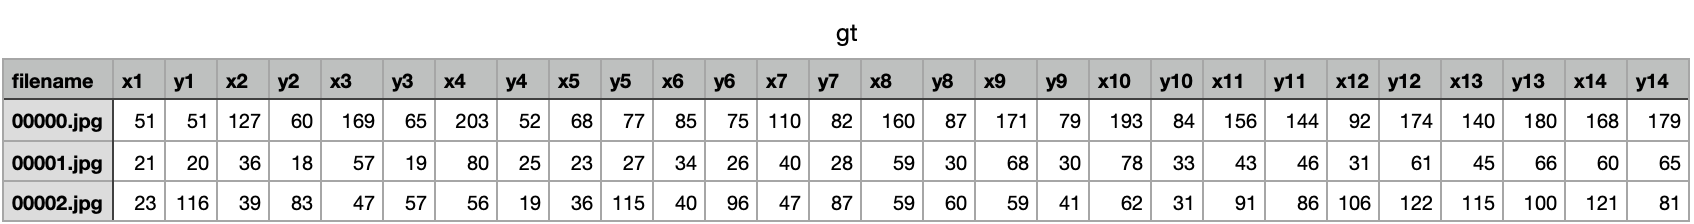


    * Create same from of the csv. DONE
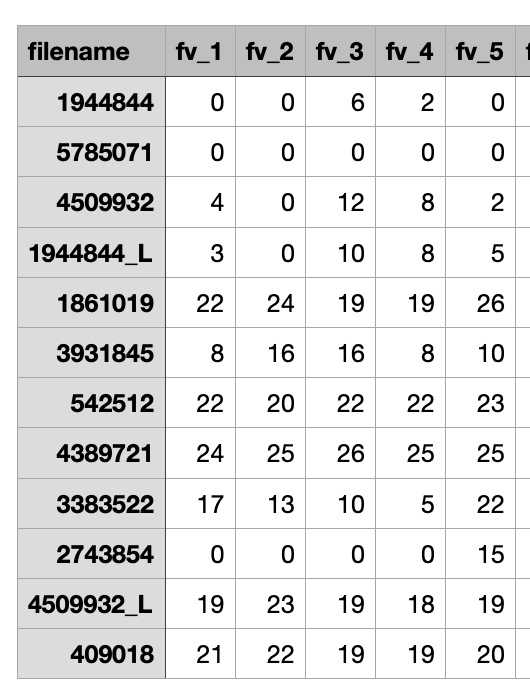
    
    

## 2022-09-15
    * add model Visualization
    * add grandent activation map
    

## keypoints regression



### Load and preprocess data

Script `get_data.py` unpacks data — images and labelled points. 6000 images are located in `images` folder and keypoint coordinates are in `gt.csv` file. Run the cell below to unpack data.

In [1]:
# from get_data import unpack
# unpack('facial-keypoints-data.zip')

Now you have to read `gt.csv` file and images from `images` dir. File `gt.csv` contains header and ground truth points for every image in `images` folder. It has 29 columns. First column is a filename and next 28 columns are `x` and `y` coordinates for 14 facepoints. We will make following preprocessing:
1. Scale all images to resolution $100 \times 100$ pixels.
2. Scale all coordinates to range $[-0.5; 0.5]$. To obtain that, divide all x's by width (or number of columns) of image, and divide all y's by height (or number of rows) of image and subtract 0.5 from all values.

Function `load_imgs_and_keypoint` should return a tuple of two numpy arrays: `imgs` of shape `(N, 100, 100, 3)`, where `N` is the number of images and `points` of shape `(N, 28)`.

In [2]:
# To enable interactivity you need to use the notebook backend of matplotlib.

# for jupyter-notebook
# %matplotlib notebook 

# for jupyter-lab
# %matplotlib widget

import os
# set log level should be before import tf, to skip "TF_ENABLE_AUTO_MIXED_PRECISION has no effect"
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# INFO messages are not printed.
# This must be run before loading other modules.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
### Useful routines for preparing data
import numpy as np
from numpy import array, zeros
from os.path import join
from skimage.color import gray2rgb
from skimage.io import imread
from skimage.transform import resize
import csv, cv2
# import os
import skimage


import tensorflow as tf # replace all keras layers

from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle

In [4]:
# take 3000 image to memory take 10mins, we should write it into tf.data 

In [5]:
%%time

img_size = 224 #1024 # 224 #500 #50 # 224 for A+DAS test



#num_imgs = 2 #300 #3000 # take [3000:2*3000]  leave head-3000

# def load_imgs_and_keypoints(dirname='PCGA-points'):
#     # Write your code for loading images and points here
    
#     points_dict={}
#     with open("./FV_image_value_0927.csv", 'r') as csvfile:
#         csvreader = csv.reader(csvfile)
#         count=0
#         for row in csvreader:
#             if count==0:
#                 count+=1
#                 continue
#             points_dict[row[0]]= [int(x) for x in row[1:]]
#     print("Dict created")
    
    
#     folder = "/home/u3148947/data/PACG_0927/PACG_fovea_centered_fundus_crop/"
#     images = []
#     points = []
#     for filename in sorted(os.listdir(folder)):#[num_imgs:2*num_imgs]:                   # all 12 images
#         print(filename, os.path.join(folder,filename))
#         img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2RGB) # org image
#         cols,rows,_ = img.shape                                                          # org image 
#         if img is not None:
#             images.append(skimage.transform.resize(img,(img_size,img_size)))             # resize image
#             filename = os.path.splitext(filename)[0]                                     # without ".jpg"
#             point = points_dict[filename]
#             print("  check---", point, img.shape)
            
# #             for i in range(52):                                                        # fv do need rescal
# #                 """ convert xy to [-0.5, 0.5]
# #                     why?
# #                 """
# #                 print("  check---", "p14#", i)
# #                 print("  check---", "org2nor", point[2*i])
# #                 point[2*i] = point[2*i]/cols - 0.5
# #                 print("  check---", "org2nor", point[2*i])
# #                 point[2*i+1] = point[2*i+1]/rows - 0.5

#             print("  check---", point)
#             points.append(point)
      
#     images = np.array(images)
#     points = np.array(points)
# #     points = sort_points(points)
#     print(images.shape,points.shape)
    
#     return images, points

# imgs, points = load_imgs_and_keypoints()



def load_imgs_and_keypoints(CSV_name, dirname='PCGA-points'):
    # Write your code for loading images and points here
    # sources [10-05]
    FV_img = "POACG_crop"                          #視野
    FV_val = "POACG_FV_vaule"                    #視野值
    FD_img = "PACG_fovea_centered_fundus_crop"                 #眼底
    FD_cod = "PACG_fovea_cnetered_fundus_crop_FV_referencePT"  #眼點黃斑、光盤座標

    data_Dir = "~/data/PACG_data_20221005/"
    data_Dir = "/home/u3148947/data/PACG_data_20221005/"

    points_dict={}
    with open(CSV_name, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count=0
        for row in csvreader:
            if count==0:
                count+=1
                continue
            points_dict[row[0]]= [int(x) for x in row[1:]]
    print("Dict created")
#     print(points_dict['0268212'])
#     print(points_dict.keys())
    filename_list = [name + ".jpg" for name in points_dict.keys()]
    
    folder = "/home/u3148947/data/PACG_data_20221005/POACG_crop"
    images = []
    points = []
#     for filename in sorted(os.listdir(folder)):#[num_imgs:2*num_imgs]:                   # all 12 images
    for filename in filename_list:                                                       # name from list to make sure all is fixed
        #print("  check---", filename, os.path.join(folder,filename))
        img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2RGB) # org image
        #print("  check---", "img read")
        cols,rows,_ = img.shape                                                          # org image 
        
        if img is not None:
            images.append(skimage.transform.resize(img,(img_size,img_size)))             # resize image
            #print("  check---", "image append")
            filename = os.path.splitext(filename)[0]                                     # without ".jpg"
            #print("  check---", "filename rm .jpg")
            point = points_dict[filename]
            #print("  check---", point, img.shape)
            
#             for i in range(52):                                                        # fv do need rescal
#                 """ convert xy to [-0.5, 0.5]
#                     why?
#                 """
#                 print("  check---", "p14#", i)
#                 print("  check---", "org2nor", point[2*i])
#                 point[2*i] = point[2*i]/cols - 0.5
#                 print("  check---", "org2nor", point[2*i])
#                 point[2*i+1] = point[2*i+1]/rows - 0.5

            #print("  check---", point)
            points.append(point)
      
    images = np.array(images)
    points = np.array(points)
#     points = sort_points(points)
    print(images.shape,points.shape)
    
    return images, points

# NoFixedShuffle
# imgs, points = load_imgs_and_keypoints("FV_image_value_1005.csv")

# FixedShuffle
imgs_train, points_train = load_imgs_and_keypoints("FV_image_value_1005_train.csv")
imgs_val, points_val = load_imgs_and_keypoints("FV_image_value_1005_val.csv")




Dict created
(244, 224, 224, 3) (244, 52)
Dict created
(27, 224, 224, 3) (27, 52)
CPU times: user 45.3 s, sys: 29.6 s, total: 1min 14s
Wall time: 29.6 s


## tfds shuffle 
    NO we are not use tfda currently!!

In [6]:
# tfds shuffle 
# train_all = tf.data.Dataset.zip((imgs_train, points_train))
# train_all = train_all.shuffle(50, reshuffle_each_iteration=True)

In [7]:
!ls /home/u3148947/data/PACG_data_20221005/POACG_crop/1084274jpg

ls: cannot access '/home/u3148947/data/PACG_data_20221005/POACG_crop/1084274jpg': No such file or directory


In [8]:
!ls -la /home/u3148947/data/PACG/PACG_fovea_cnetered_fundus_crop/0409018.jpg

-rw-r--r-- 1 u3148947 TRI108216 199625 Sep  8 10:57 /home/u3148947/data/PACG/PACG_fovea_cnetered_fundus_crop/0409018.jpg


In [9]:
# check point normaization
0/94 - 0.5

-0.5

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  3,  0,  0,  3,  0,  0,  0, 25, 25,  0, 12,
        0,  4,  0,  0, 27, 30, 23, 20,  0,  4,  0, 26, 24, 18,  0,  0, 22,
       22])

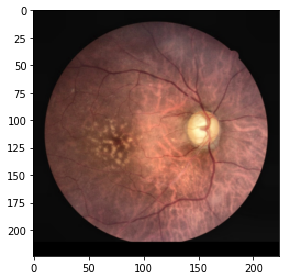

In [10]:
# Example of output

from skimage.io import imshow
# imshow(imgs[0])
# points[0]

imshow(imgs_train[0])
points_train[0]

### Visualize data

Let's prepare a function to visualize points on image. Such function obtains two arguments: an image and a vector of points' coordinates and draws points on image (just like first image in this notebook).

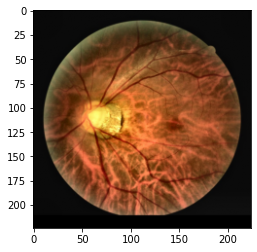

In [11]:


def visualize_points(img, points):
    plt.figure()
    plt.imshow(img)
    cols,rows,_ = img.shape
    patches=[]
    r=0.4
    fig = plt.gcf()
    ax = fig.gca()
    for i in range(14):
        ax.add_artist((Circle(((points[2*i]+0.5)*cols, (points[2*i+1]+0.5)*rows), r, color='r')))
    
# visualize_points(imgs[1], points[1])
visualize_points(imgs_train[1], points_train[1])

In [12]:
def visualize_points1(img, points,j):
    plt.figure()
    plt.imshow(img)
    cols,rows,_ = img.shape
    patches=[]
    r=0.4
    fig = plt.gcf()
    ax = fig.gca()
    for i in range(j,j+1):
        ax.add_artist((Circle(((points[2*i]+0.5)*cols, (points[2*i+1]+0.5)*rows), r, color='r')))

### Train/val split

Run the following code to obtain train/validation split for training neural network.

In [13]:
# # comment ! IF use fixed val_list

# from sklearn.model_selection import train_test_split
# imgs_train, imgs_val, points_train, points_val = train_test_split(imgs, points, random_state=42, test_size=0.1)

### Simple data augmentation

For better training we will use simple data augmentation — flipping an image and points. Implement function flip_img which flips an image and its' points. Make sure that points are flipped correctly! For instance, points on right eye now should be points on left eye (i.e. you have to mirror coordinates and swap corresponding points on the left and right sides of the face). VIsualize an example of original and flipped image.

For correct NN training, the augmented photos should have the facial keypoints listed in the same order. The 14 keypoints are present in the original dataset in the below order. When the image is flipped, we need to invert the x-coordinate of the point, as well as place in on the opposite side of the face. 

0: left eyebrow, outer

1: left eyebrow, inner

2: right eyebrow, inner

3: right eyebrow, outer

4: left eye, outer

5: left eye, center

6: left eye, inner

7: right eye, inner

8: right eye, center

9: right eye, outer

10: nose center

11: mouth, left

12: mouth, center 

13: mouth, right

In [14]:
len(imgs_train)

244

In [15]:
len(imgs_val)

27

### this x.y location flip is not working for FV-value, SO WE SKIP THIS AUG.

    array([17, 13, 10,  5, 22, 25, 21, 17, 18,  8, 16, 23, 23, 11,  2, 18, 20,
       21, 18, 20, 25,  0,  7,  0, 22, 29, 24, 26, 28, 28, 29, 27,  0, 25,
       26, 29, 29, 29, 28, 26, 25, 24, 25, 26, 26, 25, 28, 30, 28, 26, 26,
       24])
       
       to
       
       array([-21.,  17., -22.,  25., -10.,   5., -17.,  13., -18.,  20., -20.,
        21.,  -2.,  18., -23.,  11., -16.,  23., -18.,   8., -25.,   0.,
       -24.,  26., -22.,  29.,  -7.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])


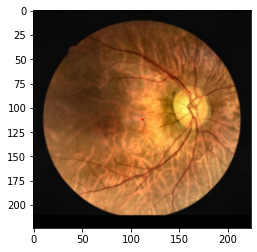

In [16]:
def flip_img(img, points):
    img_flip = img[:, ::-1]
    points_flip = np.zeros(points.shape)
    flip_indices = [3,2,1,0,9,8,7,6,5,4,10,13,12,11]
    for i in range(14):
        points_flip[2*i] = -points[2*flip_indices[i]]
        points_flip[2*i+1] = points[2*flip_indices[i]+1]
    return img_flip, points_flip

# f_img, f_points = flip_img(imgs[6], points[6])
f_img, f_points = flip_img(imgs_train[6], points_train[6])
visualize_points(f_img, f_points)

In [17]:
f_points

array([-11.,   6.,   0.,   7.,   0.,   0.,   0.,   0., -16.,  18., -21.,
        19., -25.,  22., -19.,  18.,  -2.,  18., -20.,  16., -26.,  29.,
       -16.,   0., -24.,  20., -28.,  26.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

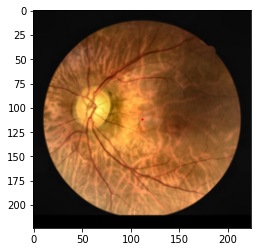

In [18]:
visualize_points(imgs_train[6], points_train[6])

In [19]:
points_train[6]

array([ 0,  0,  0,  0,  0,  7, 11,  6, 20, 16,  2, 18, 19, 18, 25, 22, 21,
       19, 16, 18, 26, 29, 28, 26, 24, 20, 16,  0, 27, 30, 28, 28, 24, 23,
       14, 24, 26, 28, 29, 28, 23, 14, 22, 26, 25, 23, 18, 17, 24, 25, 21,
        9])

Time to augment our training sample. Apply flip to every image in training sample. As a result you should obtain two arrays: `aug_imgs_train` and `aug_points_train` which contain original images and points along with flipped ones.

In [20]:
aug_imgs_train = []
aug_points_train = []

for i in range(imgs_train.shape[0]):
    img_flip, points_flip = flip_img(imgs_train[i],points_train[i])
    aug_imgs_train.append(imgs_train[i])
    aug_imgs_train.append(img_flip)
    aug_points_train.append(points_train[i])
    aug_points_train.append(points_flip)

aug_imgs_train = np.array(aug_imgs_train)
aug_points_train = np.array(aug_points_train)
print(imgs_train.shape, points_train.shape)
print(aug_imgs_train.shape, aug_points_train.shape)

(244, 224, 224, 3) (244, 52)
(488, 224, 224, 3) (488, 52)


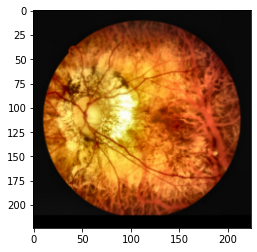

In [21]:
visualize_points1(aug_imgs_train[5], aug_points_train[5],1)

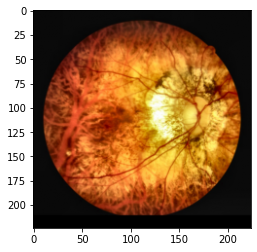

In [22]:
visualize_points1(aug_imgs_train[4], aug_points_train[4],1)

### Network architecture and training

Now let's define neural network regressor. It will have 28 outputs, 2 numbers per point. The precise architecture is up to you. We recommend to add 2-3 (`Conv2D` + `MaxPooling2D`) pairs, then `Flatten` and 2-3 `Dense` layers. Don't forget about ReLU activations. We also recommend to add `Dropout` to every `Dense` layer (with p from 0.2 to 0.5) to prevent overfitting.


In [23]:
# # from keras.models import Sequential
# # from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# # from keras.layers.advanced_activations import LeakyReLU
# # from keras.initializers import glorot_uniform


# # chage to tf.keras.layers. and tf.keras.layers.advanced_activations. tf.keras.initializers.

# model = tf.keras.Sequential(name="KPR-model101")

# model.add(tf.keras.layers.Conv2D(16, (3,3), input_shape=(img_size, img_size, 3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(32, (3,3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(64, (3,3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))  

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128,kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))

# model.add(tf.keras.layers.Dropout(0.5)) 

# model.add(tf.keras.layers.Dense(64,kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0))

# model.add(tf.keras.layers.Dense(52,kernel_initializer=tf.keras.initializers.glorot_uniform())) #28 -> 52


In [24]:
NUM_KEYPOINTS = 52
IMG_SIZE = img_size

# def get_model():
#     # Load the pre-trained weights of MobileNetV2 and freeze the weights
#     backbone = tf.keras.applications.MobileNetV2(
#         weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
#     )
#     backbone.trainable = False

#     inputs = tf.keras.layers.Input((IMG_SIZE, IMG_SIZE, 3))
#     x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
#     x = backbone(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = tf.keras.layers.SeparableConv2D(
#         NUM_KEYPOINTS, kernel_size=5, strides=1, activation="relu"
#     )(x)
#     outputs = tf.keras.layers.SeparableConv2D(
#         NUM_KEYPOINTS, kernel_size=3, strides=1, activation="sigmoid"
#     )(x)

#     return tf.keras.Model(inputs, outputs, name="keypoint_detector")


def get_model():
    # Load the pre-trained weights of MobileNetV2 and freeze the weights
    backbone = tf.keras.applications.DenseNet201(
        weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    backbone.trainable = False

    inputs = tf.keras.layers.Input((IMG_SIZE, IMG_SIZE, 3))
    x = tf.keras.applications.densenet.preprocess_input(inputs)
    x = backbone(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.SeparableConv2D(
        NUM_KEYPOINTS, kernel_size=5, strides=1, activation="relu"
    )(x)
    outputs = tf.keras.layers.SeparableConv2D(
        NUM_KEYPOINTS, kernel_size=3, strides=1, activation="sigmoid"
    )(x)
    
    # For fix the final output shape is (32, 26, 26, 52) not same as (batch, 52)
    outputs = tf.keras.layers.Flatten()(outputs)
    outputs = tf.keras.layers.Dense(128,kernel_initializer=tf.keras.initializers.glorot_uniform())(outputs)
    outputs = tf.keras.layers.LeakyReLU(alpha=0.1)(outputs)
    outputs = tf.keras.layers.Dense(NUM_KEYPOINTS,kernel_initializer=tf.keras.initializers.glorot_uniform())(outputs)
    
    return tf.keras.Model(inputs, outputs, name="KPR-model-kerasApp-224x224")

model = get_model()

In [25]:
# model Visualization

# from tf.keras.utils import plot_model
# tf.keras.utils.plot_model(model, to_file='KPR-model-kerasApp_1005.png')

In [26]:
model.summary()

Model: "KPR-model-kerasApp-224x224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 224, 224, 3)       0         
_________________________________________________________________
densenet201 (Functional)     (None, 7, 7, 1920)        18321984  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 1920)        0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 3, 3

    Model: "KPR-model-kerasApp"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    input_6 (InputLayer)         [(None, 1024, 1024, 3)]   0         
    _________________________________________________________________
    tf.math.truediv_4 (TFOpLambd (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    tf.nn.bias_add_2 (TFOpLambda (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    tf.math.truediv_5 (TFOpLambd (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    densenet201 (Functional)     (None, 32, 32, 1920)      18321984  
    _________________________________________________________________
    dropout_6 (Dropout)          (None, 32, 32, 1920)      0         
    _________________________________________________________________
    separable_conv2d_4 (Separabl (None, 28, 28, 52)        147892    
    _________________________________________________________________
    separable_conv2d_5 (Separabl (None, 26, 26, 52)        3224      
    =================================================================
    Total params: 18,473,100
    Trainable params: 151,116
    Non-trainable params: 18,321,984
    _________________________________________________________________



    Model: "KPR-model-kerasApp"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    input_2 (InputLayer)         [(None, 1024, 1024, 3)]   0         
    _________________________________________________________________
    tf.math.truediv (TFOpLambda) (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    tf.nn.bias_add (TFOpLambda)  (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    tf.math.truediv_1 (TFOpLambd (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    densenet201 (Functional)     (None, 32, 32, 1920)      18321984  
    _________________________________________________________________
    dropout_4 (Dropout)          (None, 32, 32, 1920)      0         
    _________________________________________________________________
    separable_conv2d (SeparableC (None, 28, 28, 52)        147892    
    _________________________________________________________________
    separable_conv2d_1 (Separabl (None, 26, 26, 52)        3224      
    _________________________________________________________________
    flatten_1 (Flatten)          (None, 35152)             0         
    _________________________________________________________________
    dense_3 (Dense)              (None, 128)               4499584   
    _________________________________________________________________
    leaky_re_lu_5 (LeakyReLU)    (None, 128)               0         
    _________________________________________________________________
    dense_4 (Dense)              (None, 52)                6708      
    =================================================================
    Total params: 22,979,392
    Trainable params: 4,657,408
    Non-trainable params: 18,321,984
    _________________________________________________________________


    Model: "KPR-model101"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    conv2d_12 (Conv2D)           (None, 1024, 1024, 16)    448       
    _________________________________________________________________
    leaky_re_lu_20 (LeakyReLU)   (None, 1024, 1024, 16)    0         
    _________________________________________________________________
    max_pooling2d_12 (MaxPooling (None, 512, 512, 16)      0         
    _________________________________________________________________
    dropout_25 (Dropout)         (None, 512, 512, 16)      0         
    _________________________________________________________________
    conv2d_13 (Conv2D)           (None, 512, 512, 32)      4640      
    _________________________________________________________________
    leaky_re_lu_21 (LeakyReLU)   (None, 512, 512, 32)      0         
    _________________________________________________________________
    max_pooling2d_13 (MaxPooling (None, 256, 256, 32)      0         
    _________________________________________________________________
    dropout_26 (Dropout)         (None, 256, 256, 32)      0         
    _________________________________________________________________
    conv2d_14 (Conv2D)           (None, 256, 256, 64)      18496     
    _________________________________________________________________
    leaky_re_lu_22 (LeakyReLU)   (None, 256, 256, 64)      0         
    _________________________________________________________________
    max_pooling2d_14 (MaxPooling (None, 128, 128, 64)      0         
    _________________________________________________________________
    dropout_27 (Dropout)         (None, 128, 128, 64)      0         
    _________________________________________________________________
    flatten_4 (Flatten)          (None, 1048576)           0         
    _________________________________________________________________
    dense_14 (Dense)             (None, 128)               134217856 
    _________________________________________________________________
    leaky_re_lu_23 (LeakyReLU)   (None, 128)               0         
    _________________________________________________________________
    dropout_28 (Dropout)         (None, 128)               0         
    _________________________________________________________________
    dense_15 (Dense)             (None, 64)                8256      
    _________________________________________________________________
    leaky_re_lu_24 (LeakyReLU)   (None, 64)                0         
    _________________________________________________________________
    dense_16 (Dense)             (None, 52)                3380      
    =================================================================
    Total params: 134,253,076
    Trainable params: 134,253,076
    Non-trainable params: 0
    _________________________________________________________________

Time to train! Since we are training a regressor, make sure that you use mean squared error (mse) as loss. Feel free to experiment with optimization method (SGD, Adam, etc.) and its' parameters.

In [27]:
# ModelCheckpoint can be used for saving model during training.
# Saved models are useful for finetuning your model 
# See keras documentation for more info
# from tf.keras.callbacks import ModelCheckpoint
# from tf.keras.optimizers import SGD, Adam

# change to
# tf.keras.callbacks.ModelCheckpoint
# tf.keras.optimizers.SGD
# tf.keras.optimizers.Adam

# Choose optimizer, compile model and run training
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(), metrics=['mean_squared_error', 'mean_absolute_error', tf.keras.metrics.RootMeanSquaredError()])

In [28]:
BATCH_SIZE = 32
EPOCHS = 200

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

#best_model = f'ZhuYin/best_model/Zhuyin_encoder_cleanGT_nNet_ckpt/' + model_name + "_" + str(img_size) + 'x' + str(img_size) + '_' + str(MULTI_BATCH_SIZE) + '_{epoch:04}' # + {epoch} for save every best ckpt models
best_model = "best_my_model_1006_bs32_p0_e200_FixedShuffle_224/224_kpg_ckpt"
save_best_model = tf.keras.callbacks.ModelCheckpoint(filepath=best_model, monitor='val_loss', save_weights_only=True, save_best_only=True, mode='auto', verbose=1)

# lr_schedul = tf.keras.callbacks.LearningRateScheduler(CosineDecayCLRWarmUpLSW_2)


callbacks=[early_stop, 
           save_best_model, 
           #tensorboard_callback, 
           #lr_schedul, 
           #PrintLR(), # teake 4~5 sec per epoch!!!!
          ] # evl_img_callback],

# callbacks=callbacks

In [31]:
%%time

hist = model.fit(
    #aug_imgs_train, aug_points_train,          # note that: x,y flip is not work for FV-value 
    imgs_train, points_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(imgs_val, points_val),
    shuffle=True, # This argument is ignored when x is a generator or an object of tf.data.Dataset.
    verbose=1,
    callbacks=callbacks,
)

Epoch 1/200
8/8 [==============================] - 83s 6s/step - loss: 513.4050 - mean_squared_error: 513.4050 - mean_absolute_error: 20.2120 - root_mean_squared_error: 22.6584 - val_loss: 607.4518 - val_mean_squared_error: 607.4518 - val_mean_absolute_error: 23.4583 - val_root_mean_squared_error: 24.6465

Epoch 00001: val_loss improved from inf to 607.45178, saving model to best_my_model_1006_bs32_p0_e200_FixedShuffle_224/224_kpg_ckpt
Epoch 2/200
8/8 [==============================] - 1s 183ms/step - loss: 493.3642 - mean_squared_error: 493.3642 - mean_absolute_error: 19.8234 - root_mean_squared_error: 22.2118 - val_loss: 577.0147 - val_mean_squared_error: 577.0147 - val_mean_absolute_error: 22.8504 - val_root_mean_squared_error: 24.0211

Epoch 00002: val_loss improved from 607.45178 to 577.01471, saving model to best_my_model_1006_bs32_p0_e200_FixedShuffle_224/224_kpg_ckpt
Epoch 3/200
8/8 [==============================] - 2s 264ms/step - loss: 460.0014 - mean_squared_error: 460.0014

In [32]:
_1006_bs32_p0_e200_
Epoch 00199: val_loss did not improve from 55.48315
Epoch 200/200
8/8 [==============================] - 6s 802ms/step - loss: 60.3071 - mean_squared_error: 60.3071 - mean_absolute_error: 6.0912 - root_mean_squared_error: 7.7658 - val_loss: 91.1561 - val_mean_squared_error: 91.1561 - val_mean_absolute_error: 6.7619 - val_root_mean_squared_error: 9.5476
CPU times: user 6min 57s, sys: 2min 40s, total: 9min 37s
Wall time: 23min 7s
    

_1006_bs2_p0_e200_
Epoch 00199: val_loss did not improve from 51.45002
Epoch 200/200
122/122 [==============================] - 9s 71ms/step - loss: 98.8630 - mean_squared_error: 98.8630 - mean_absolute_error: 7.9771 - root_mean_squared_error: 9.9430 - val_loss: 57.9226 - val_mean_squared_error: 57.9226 - val_mean_absolute_error: 6.1787 - val_root_mean_squared_error: 7.6107
CPU times: user 28min 23s, sys: 4min 7s, total: 32min 30s
Wall time: 30min 14s 

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2149835937.py, line 2)

In [ ]:
# model.save_weights('_1006_bs32_p0_e200_my_model_weights_1006.h5')

# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [ ]:
# model.load_weights('my_model_weights.h5')

$\color{color-code}{your-text-here}$

<font color=#0fb503>other color</font>

# Ploting

In [ ]:
"因為loss是用mse算出 因此兩者相同"

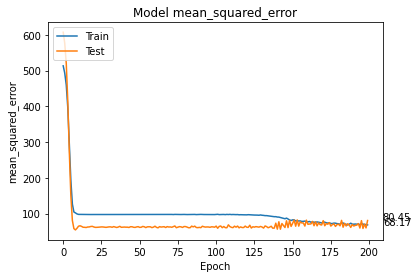

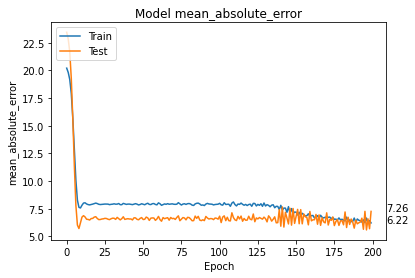

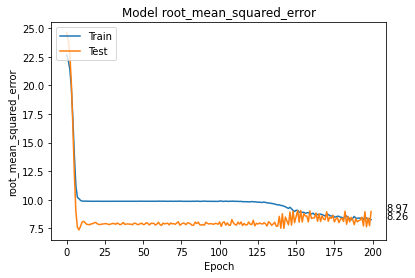

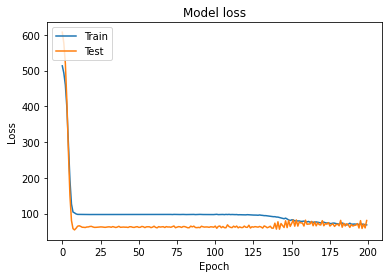

In [33]:



history = hist

# mse
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


tr=history.history['mean_squared_error']
vr=history.history['val_mean_squared_error']
plt.annotate(f'{vr[-1]:.2f}', xy=(1, vr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')#, arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),)
plt.annotate(f'{tr[-1]:.2f}', xy=(1, tr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.savefig('KPR-model_mean_squared_error.jpg', dpi=150)
plt.show()


# mae
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


tr=history.history['mean_absolute_error']
vr=history.history['val_mean_absolute_error']
plt.annotate(f'{vr[-1]:.2f}', xy=(1, vr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')#, arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),)
plt.annotate(f'{tr[-1]:.2f}', xy=(1, tr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.savefig('KPR-model_mean_absolute_error.jpg', dpi=150)
plt.show()


# RMSE root_mean_squared_error
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

tr=history.history['root_mean_squared_error']
vr=history.history['val_root_mean_squared_error']
plt.annotate(f'{vr[-1]:.2f}', xy=(1, vr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')#, arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),)
plt.annotate(f'{tr[-1]:.2f}', xy=(1, tr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.savefig('KPR-model_root_mean_squared_error.jpg', dpi=150)
plt.show()


# loss = mean_squared_error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
tr[-1]

8.256803512573242

# Visualize results for PCGA

### Reload trained weight

In [35]:
#restore_model = tf.keras.models.load_model('my_model_weights.h5')

# # reload the weights not the load_model !
# model.load_weights('my_model_weights.h5')

# realod from ckpt save_weight_only, "best_my_model_1005/kpg_ckpt"


# model.load_weights('_1006_bs32_p0_e200_my_model_weights_1006.h5')
model.load_weights(best_model)


# model.load_weights("best_my_model_1006_bs2_p0_e200/kpg_ckpt")

print("Reload best model from:\n", best_model)

Reload best model from:
 best_my_model_1006_bs32_p0_e200_FixedShuffle_224/224_kpg_ckpt


### Re - Save best model to tf.saved_model.save() formate

In [36]:
# re_save_saved = 'best_my_model_1006_bs32_p0_e200_FixedShuffle_saved/sms'

re_save_saved = 'best_my_model_1006_bs32_p0_e200_FixedShuffle_saved/sms_224'
tf.saved_model.save(model, re_save_saved)
print("re-save to saved mode!", re_save_saved)


INFO:tensorflow:Assets written to: best_my_model_1006_bs32_p0_e200_FixedShuffle_saved/sms_224/assets
re-save to saved mode! best_my_model_1006_bs32_p0_e200_FixedShuffle_saved/sms_224


### Predict validation images

In [37]:
val_points_pred = model.predict(imgs_val) # imgs_train imgs_val

In [38]:
val_points_pred

array([[17.669895, 17.943027, 17.606953, ..., 23.272251, 23.833181,
        21.764137],
       [17.66975 , 17.942759, 17.606743, ..., 23.271856, 23.83285 ,
        21.763899],
       [17.669834, 17.942673, 17.6067  , ..., 23.271572, 23.83268 ,
        21.763857],
       ...,
       [17.670267, 17.943647, 17.607456, ..., 23.27324 , 23.834017,
        21.764711],
       [17.669497, 17.942287, 17.606363, ..., 23.271067, 23.832209,
        21.763472],
       [17.6691  , 17.941616, 17.605814, ..., 23.269999, 23.831293,
        21.76285 ]], dtype=float32)

In [39]:
points_val

array([[ 3,  8, 18, ..., 27, 25, 24],
       [20, 11, 16, ..., 21, 19, 19],
       [19, 18, 22, ..., 25, 24, 19],
       ...,
       [10, 18, 20, ..., 23, 24, 27],
       [28, 28, 29, ..., 29, 23, 25],
       [24, 20, 23, ..., 23, 22, 28]])

## Restore FV-value back to FV_img (gray scale map) 
    [2022-09-29]
    FV list rows number
    
    4
    6
    8
    8
    8
    8
    6
    4

    * reshape 52 to [8, 8] pad zeros [OK]
    * reshape [8,8] to [640, 640] and pad with Interpolation [NO, better keep it as it is. even for pix2pix training.]
    * plot as gray image [OK]

In [40]:
# check one fv_value
print(f"52 value: \n\t{points_val[0]}")
print(f"shape 1: \n\t{points_val[0].shape}")
print(f"length 1: \n\t{len(points_val[0])}")
# points_val[0]

52 value: 
	[ 3  8 18 10 24 23  3 21 22 23 20 26 26 26 24 24 26 23 25 14 28 30 29 28
 25 20 29  0 10 31 31 29 28 23 27 30 31 30 31 30 29 26 23 27 27 29 29 25
 28 27 25 24]
shape 1: 
	(52,)
length 1: 
	52


In [41]:
np.__version__

'1.19.4'

In [42]:
# points_val[0].reshape(8,8)

In [43]:
# np.reshape(points_val[0], (8,8))

In [44]:
# check how to pad zero to row

sampl_arr_1 = points_val[0]
print(sampl_arr_1[:4])

sampl_arr_1 = np.pad(sampl_arr_1[:4], ((2, 2)), 'constant',constant_values=(0))
print(sampl_arr_1)

[ 3  8 18 10]
[ 0  0  3  8 18 10  0  0]


In [45]:
def reshape_FV_value_list(fv_list):
    rank = [
        4,
        6,
        8,
        8,
        8,
        8,
        6,
        4]
#     gt_ = [
#      23 21 24 18
#      24 24 25 20 23 27
#      26 27 22 25 24 26 26 23 
#      29 23 27 28  0 27 26 25 
#      25  0 28 28 29 29 29 28 
#      30 30 30 29 26 29 28 27 
#      29 27 23 27 28 27
#      25 27 24 24]
    
#     for i, idx in enumerate(rank):
#         print(f"rank: {i} {idx}")
        
#         arr_idx_1 = np.pad(sampl_arr_1[i:idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
        
#         print(arr_idx_1)
    
    tmp_arr = []
    steps = 0
    h_rows = 4
    for i, idx in enumerate(rank):
        #print(f"rank: {i} {idx}")
        
#         # 8-rows
#         if i == 0 and idx == 4:
#             arr_idx_1 = np.pad(fv_list[0:idx], ((2, 2)), 'constant',constant_values=(0))
#         if i == 1 and idx == 6:
#             arr_idx_1 = np.pad(fv_list[4:4+idx], ((1, 1)), 'constant',constant_values=(0))
#         if i == 2 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[10:10+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 3 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[18:18+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 4 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[26:26+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 5 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[34:34+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 6 and idx == 6:
#             arr_idx_1 = np.pad(fv_list[42:42+idx], ((1, 1)), 'constant',constant_values=(0))
#         if i == 7 and idx == 4:
#             arr_idx_1 = np.pad(fv_list[48:48+idx], ((2, 2)), 'constant',constant_values=(0))


        # 8-rows in onece, half-rows = 4
        arr_idx_1 = np.pad(fv_list[steps : steps + idx], ((h_rows - int(idx/2), h_rows - int(idx/2))), 'constant',constant_values=(0))
        
        steps += idx
            
        tmp_arr.append(arr_idx_1)    
        
        #print(arr_idx_1)
    #print(tmp_arr)
    return np.vstack(tmp_arr)

def reshape_FV_value_to_org_list(fv_list):
    rank = [
        4,
        6,
        8,
        8,
        8,
        8,
        6,
        4]

    
    tmp_arr = []
    steps = 0
    h_rows = 4
    for i, idx in enumerate(rank):
        #print(f"rank: {i} {idx}")
        
        # 8-rows in onece, half-rows = 4
        arr_idx_1 = fv_list[steps : steps + idx]
        
        steps += idx
            
        tmp_arr.append(arr_idx_1)    
        
        #print(arr_idx_1)
    #print(tmp_arr)
    return tmp_arr

In [46]:
reshape_fv = reshape_FV_value_list(points_val[0])

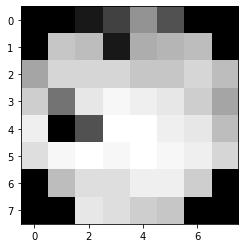

In [47]:
plt.imshow(reshape_fv, interpolation='nearest', cmap="gray")
plt.show()

In [48]:
reshape_fv_pred = reshape_FV_value_list(val_points_pred[0])

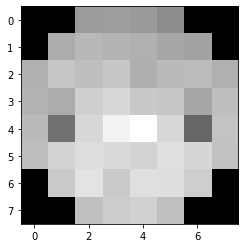

In [49]:
plt.imshow(reshape_fv_pred, interpolation='nearest', cmap="gray")
plt.show()

### Check val_FV_value_list name is in the right ordered


In [50]:
""" read in list
imgs_train, points_train 
imgs_val, points_val
"""

def get_points_dict(CSV_name):
    points_dict={}
    with open(CSV_name, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count=0
        for row in csvreader:
            if count==0:
                count+=1
                continue
            points_dict[row[0]]= [int(x) for x in row[1:]]
            
    return points_dict     
            
val_points_dict = get_points_dict("FV_image_value_1005_val.csv")


print(val_points_dict.keys())
print()
print(list(val_points_dict.items())[0])

print("val length: ", len(val_points_dict))

dict_keys(['3602493_L', '2099276', '3602493', '1545959', '3167782', '2216002_R', '5012674', '2907064_L', '3310379', '2815145_L', '0268212', '1935572', '1310627_R', '1342399_L', '4154541_L', '3407174', '3806920', '2987599', '0849116_L', '4475746_R', '2216002', '4154541', '3321454_L', '2815145', '2376139_R', '3001867', '1935572_L'])

('3602493_L', [3, 8, 18, 10, 24, 23, 3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26, 23, 25, 14, 28, 30, 29, 28, 25, 20, 29, 0, 10, 31, 31, 29, 28, 23, 27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25, 24])
val length:  27


In [51]:
# the order in CSV and val_point is correct #
print("check read from CSV [0]:\n", val_points_dict['3602493_L'], type(val_points_dict['3602493_L'])) # list object
print("check read from val [0]:\n", points_val[0], type(points_val[0]))                               # np.ndarray



check read from CSV [0]:
 [3, 8, 18, 10, 24, 23, 3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26, 23, 25, 14, 28, 30, 29, 28, 25, 20, 29, 0, 10, 31, 31, 29, 28, 23, 27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25, 24] <class 'list'>
check read from val [0]:
 [ 3  8 18 10 24 23  3 21 22 23 20 26 26 26 24 24 26 23 25 14 28 30 29 28
 25 20 29  0 10 31 31 29 28 23 27 30 31 30 31 30 29 26 23 27 27 29 29 25
 28 27 25 24] <class 'numpy.ndarray'>


#### Also check val_points_pred

In [52]:
print("check read from prd [0]:\n", val_points_pred[0], type(val_points_pred[0]))        


check read from prd [0]:
 [17.669895 17.943027 17.606953 16.117529 19.57887  21.021248 20.492506
 20.099003 19.090097 18.729237 20.191145 22.632992 21.677973 22.677052
 19.969185 21.261387 21.490396 20.077988 20.479385 19.643505 23.650347
 24.613089 22.973433 22.604662 18.97174  21.657215 21.252028 12.987477
 24.563236 27.847443 29.136269 24.502342 11.695344 22.249485 21.631691
 23.932781 25.237034 24.828356 24.170988 25.492098 24.45001  21.973028
 23.004442 25.891098 23.085596 25.468166 25.303566 23.549923 21.917578
 23.272251 23.833181 21.764137] <class 'numpy.ndarray'>


In [53]:
reshape_fv = reshape_FV_value_to_org_list(points_val[0])
reshape_fv_pred = reshape_FV_value_to_org_list(val_points_pred[0])

print("check read from val [0]:\n", reshape_fv)
print("check read from prd [0]:\n", reshape_fv_pred)

check read from val [0]:
 [array([ 3,  8, 18, 10]), array([24, 23,  3, 21, 22, 23]), array([20, 26, 26, 26, 24, 24, 26, 23]), array([25, 14, 28, 30, 29, 28, 25, 20]), array([29,  0, 10, 31, 31, 29, 28, 23]), array([27, 30, 31, 30, 31, 30, 29, 26]), array([23, 27, 27, 29, 29, 25]), array([28, 27, 25, 24])]
check read from prd [0]:
 [array([17.669895, 17.943027, 17.606953, 16.117529], dtype=float32), array([19.57887 , 21.021248, 20.492506, 20.099003, 19.090097, 18.729237],
      dtype=float32), array([20.191145, 22.632992, 21.677973, 22.677052, 19.969185, 21.261387,
       21.490396, 20.077988], dtype=float32), array([20.479385, 19.643505, 23.650347, 24.613089, 22.973433, 22.604662,
       18.97174 , 21.657215], dtype=float32), array([21.252028, 12.987477, 24.563236, 27.847443, 29.136269, 24.502342,
       11.695344, 22.249485], dtype=float32), array([21.631691, 23.932781, 25.237034, 24.828356, 24.170988, 25.492098,
       24.45001 , 21.973028], dtype=float32), array([23.004442, 25.89109

In [54]:
reshape_fv_pred

[array([17.669895, 17.943027, 17.606953, 16.117529], dtype=float32),
 array([19.57887 , 21.021248, 20.492506, 20.099003, 19.090097, 18.729237],
       dtype=float32),
 array([20.191145, 22.632992, 21.677973, 22.677052, 19.969185, 21.261387,
        21.490396, 20.077988], dtype=float32),
 array([20.479385, 19.643505, 23.650347, 24.613089, 22.973433, 22.604662,
        18.97174 , 21.657215], dtype=float32),
 array([21.252028, 12.987477, 24.563236, 27.847443, 29.136269, 24.502342,
        11.695344, 22.249485], dtype=float32),
 array([21.631691, 23.932781, 25.237034, 24.828356, 24.170988, 25.492098,
        24.45001 , 21.973028], dtype=float32),
 array([23.004442, 25.891098, 23.085596, 25.468166, 25.303566, 23.549923],
       dtype=float32),
 array([21.917578, 23.272251, 23.833181, 21.764137], dtype=float32)]

In [55]:
val_points_pred[0] #ndarray
# len(val_points_pred[0])

array([17.669895, 17.943027, 17.606953, 16.117529, 19.57887 , 21.021248,
       20.492506, 20.099003, 19.090097, 18.729237, 20.191145, 22.632992,
       21.677973, 22.677052, 19.969185, 21.261387, 21.490396, 20.077988,
       20.479385, 19.643505, 23.650347, 24.613089, 22.973433, 22.604662,
       18.97174 , 21.657215, 21.252028, 12.987477, 24.563236, 27.847443,
       29.136269, 24.502342, 11.695344, 22.249485, 21.631691, 23.932781,
       25.237034, 24.828356, 24.170988, 25.492098, 24.45001 , 21.973028,
       23.004442, 25.891098, 23.085596, 25.468166, 25.303566, 23.549923,
       21.917578, 23.272251, 23.833181, 21.764137], dtype=float32)

In [56]:
# try np to np.savetext
tmp_np = np.array(val_points_pred[0])
# tmp_np.shape
np.savetxt("test_np_savetext.txt", tmp_np, delimiter=',', fmt='%s') # only %s works for non-same shape arrays

In [57]:
!cat test_np_savetext.txt

17.669895
17.943027
17.606953
16.117529
19.57887
21.021248
20.492506
20.099003
19.090097
18.729237
20.191145
22.632992
21.677973
22.677052
19.969185
21.261387
21.490396
20.077988
20.479385
19.643505
23.650347
24.613089
22.973433
22.604662
18.97174
21.657215
21.252028
12.987477
24.563236
27.847443
29.136269
24.502342
11.695344
22.249485
21.631691
23.932781
25.237034
24.828356
24.170988
25.492098
24.45001
21.973028
23.004442
25.891098
23.085596
25.468166
25.303566
23.549923
21.917578
23.272251
23.833181
21.764137


In [58]:
# try np to np.savetext
tmp_np = np.array(reshape_fv_pred)
# tmp_np.shape
np.savetxt("test_np_savetext.txt", tmp_np, delimiter=',', fmt='%s') # only %s works for non-same shape arrays

/tmp/ipykernel_382/3455417093.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp_np = np.array(reshape_fv_pred)


In [59]:
!cat test_np_savetext.txt

[17.669895 17.943027 17.606953 16.117529]
[19.57887  21.021248 20.492506 20.099003 19.090097 18.729237]
[20.191145 22.632992 21.677973 22.677052 19.969185 21.261387 21.490396
 20.077988]
[20.479385 19.643505 23.650347 24.613089 22.973433 22.604662 18.97174
 21.657215]
[21.252028 12.987477 24.563236 27.847443 29.136269 24.502342 11.695344
 22.249485]
[21.631691 23.932781 25.237034 24.828356 24.170988 25.492098 24.45001
 21.973028]
[23.004442 25.891098 23.085596 25.468166 25.303566 23.549923]
[21.917578 23.272251 23.833181 21.764137]


In [60]:
# try list array to txt



def write_reshape_FV_value_to_txt(fv_list, filename):
    rank = [
        4,
        6,
        8,
        8,
        8,
        8,
        6,
        4]

    
    tmp_arr = []
    steps = 0
    h_rows = 4
    
    with open(filename, "w") as txt_file:
        for i, idx in enumerate(rank):
            #print(f"rank: {i} {idx}")

            # 8-rows in onece, half-rows = 4
            arr_idx_1 = fv_list[steps : steps + idx]

            steps += idx
            for value in arr_idx_1:
                txt_file.write("".join(str(value)) + ",") #tmp_arr.append(arr_idx_1)    
            txt_file.write("\n") #tmp_arr.append(arr_idx_1)  

            #print(arr_idx_1)
        #print(tmp_arr)
        #return tmp_arr



write_reshape_FV_value_to_txt(val_points_pred[0], "test_np_savetext.txt")


In [61]:
!cat test_np_savetext.txt

17.669895,17.943027,17.606953,16.117529,
19.57887,21.021248,20.492506,20.099003,19.090097,18.729237,
20.191145,22.632992,21.677973,22.677052,19.969185,21.261387,21.490396,20.077988,
20.479385,19.643505,23.650347,24.613089,22.973433,22.604662,18.97174,21.657215,
21.252028,12.987477,24.563236,27.847443,29.136269,24.502342,11.695344,22.249485,
21.631691,23.932781,25.237034,24.828356,24.170988,25.492098,24.45001,21.973028,
23.004442,25.891098,23.085596,25.468166,25.303566,23.549923,
21.917578,23.272251,23.833181,21.764137,


### convert pred_FV_value to list

In [62]:
!mkdir _1006_bs32_p0_e200

mkdir: cannot create directory ‘_1006_bs32_p0_e200’: File exists


In [63]:
for item in range(len(val_points_dict)):
    
    # get the filename from val dict
    val_points_dict_list = list(val_points_dict.items())
    filename = "best_my_model_1006_bs32_p0_e200_FixedShuffle/" + val_points_dict_list[item][0] + ".txt"
    print("check filename:", filename)
  
    # to value.txt , comment if not to rewrite the exist files
    # write_reshape_FV_value_to_txt(val_points_pred[item], filename)

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/3602493_L.txt
check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/2099276.txt
check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/3602493.txt
check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/1545959.txt
check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/3167782.txt
check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/2216002_R.txt
check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/5012674.txt
check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/2907064_L.txt
check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/3310379.txt
check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/2815145_L.txt
check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/0268212.txt
check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/1935572.txt
check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle/1310627_R.txt
check filename: best_my_model_1006_bs32_p

## display and save pred_FV_value to image

In [64]:
best_model.split("/")[0]

'best_my_model_1006_bs32_p0_e200_FixedShuffle_224'

In [65]:
prd_p.dtype

NameError: name 'prd_p' is not defined

In [66]:
gt_p.dtype

NameError: name 'gt_p' is not defined

In [67]:
gt_p.astype(np.float32)

NameError: name 'gt_p' is not defined

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/3602493_L_predFV.jpg
25.468166 float32 29 int64
MSE : 32.49094466999583
PSNR: 14.985376180556125
SSIM: 0.785133786708418
25 29
SSIM-tf: 0.1876903921365738


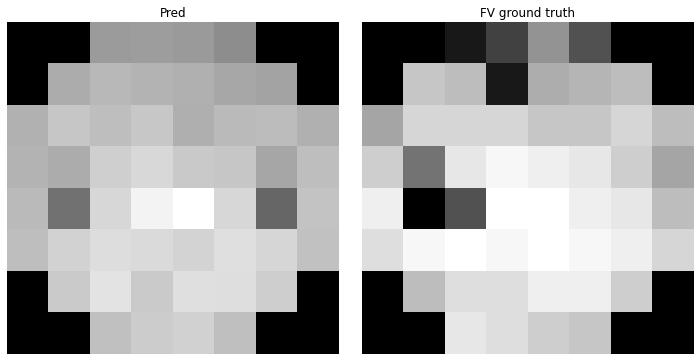

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/2099276_predFV.jpg
25.467943 float32 26 int64
MSE : 75.18663342338641
PSNR: 11.341593174635928
SSIM: 0.6133224456030576
25 26
SSIM-tf: 0.1876903921365738


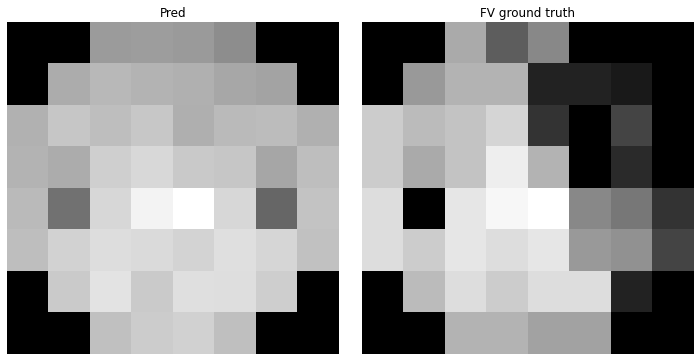

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/3602493_predFV.jpg
25.468056 float32 27 int64
MSE : 14.31058879212469
PSNR: 18.546424539834426
SSIM: 0.9043064007090604
25 27
SSIM-tf: 0.1876903921365738


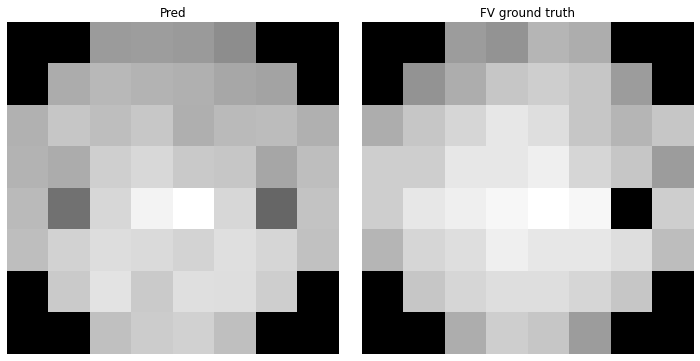

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/1545959_predFV.jpg
25.468174 float32 25 int64
MSE : 36.01982784993015
PSNR: 14.53758323781063
SSIM: 0.8479216579599969
25 25
SSIM-tf: 0.1876903921365738


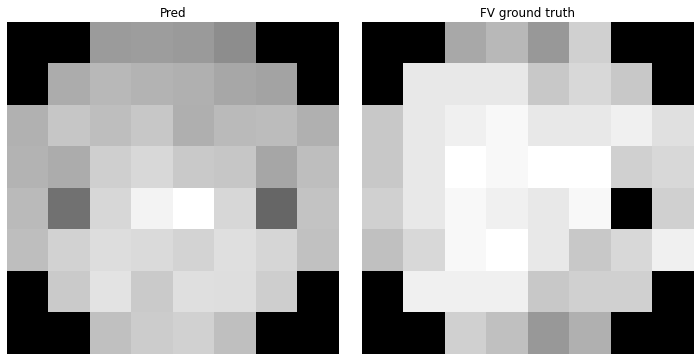

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/3167782_predFV.jpg
25.47172 float32 28 int64
MSE : 70.18641044292599
PSNR: 11.640469248657702
SSIM: 0.6243081025951931
25 28
SSIM-tf: 0.18769031763076782


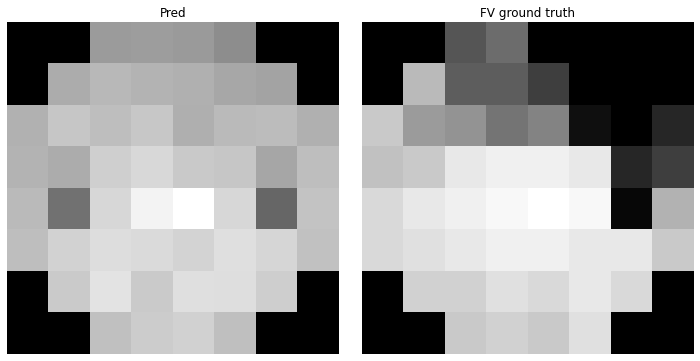

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/2216002_R_predFV.jpg
25.466923 float32 31 int64
MSE : 68.56296122260392
PSNR: 11.742103902149825
SSIM: 0.8116062797247577
25 31
SSIM-tf: 0.18769040703773499


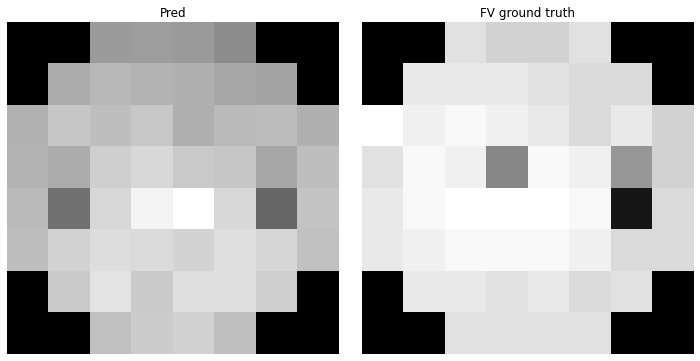

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/5012674_predFV.jpg
25.468447 float32 28 int64
MSE : 37.61968321353197
PSNR: 14.348848225013228
SSIM: 0.8701780487174451
25 28
SSIM-tf: 0.1876903772354126


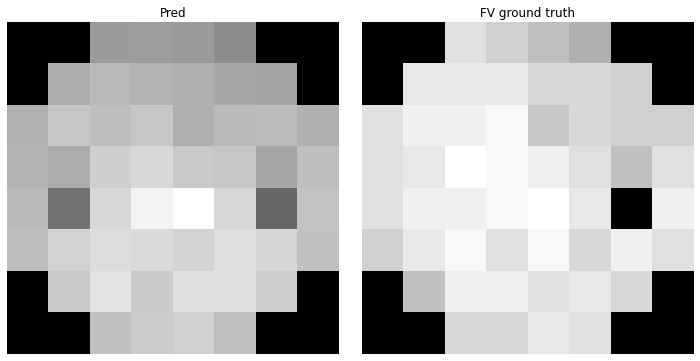

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/2907064_L_predFV.jpg
25.467684 float32 26 int64
MSE : 12.406827436410822
PSNR: 19.1663921486776
SSIM: 0.9326453825201702
25 26
SSIM-tf: 0.1876903921365738


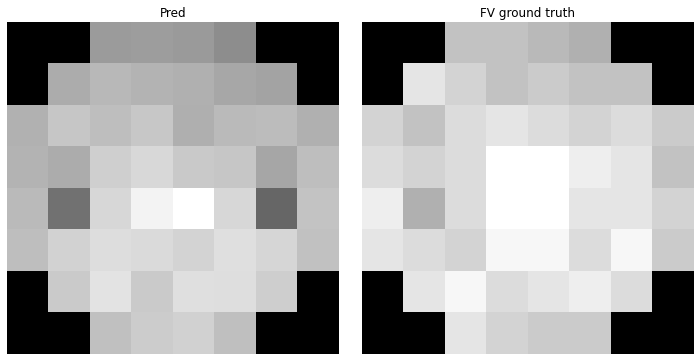

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/3310379_predFV.jpg
25.467747 float32 27 int64
MSE : 10.40869945276063
PSNR: 19.92903488010608
SSIM: 0.9097301283419984
25 27
SSIM-tf: 0.1876903921365738


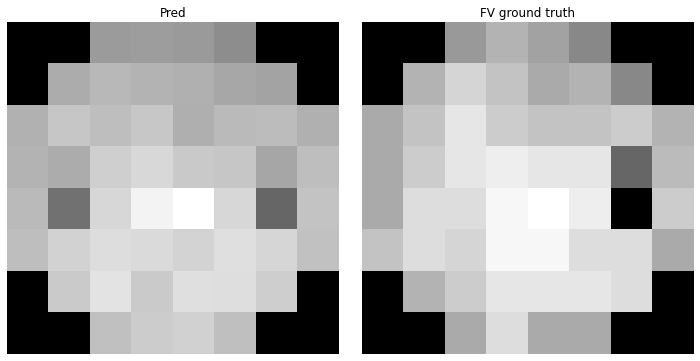

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/2815145_L_predFV.jpg
25.467356 float32 13 int64
MSE : 37.285123991809996
PSNR: 14.387643649629245
SSIM: 0.7362268252653995
25 13
SSIM-tf: 0.18769040703773499


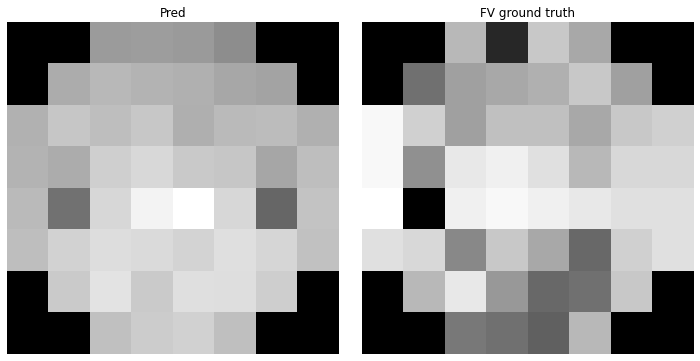

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/0268212_predFV.jpg
25.467817 float32 27 int64
MSE : 31.1005949912942
PSNR: 15.175312589646119
SSIM: 0.7870542004317017
25 27
SSIM-tf: 0.1876903921365738


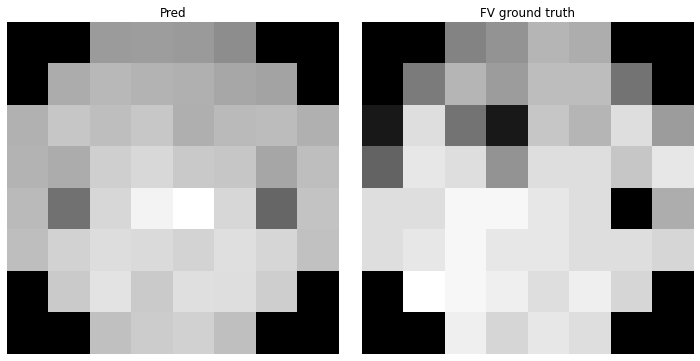

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/1935572_predFV.jpg
25.467922 float32 25 int64
MSE : 16.760582415459794
PSNR: 17.860108507330487
SSIM: 0.899605628200865
25 25
SSIM-tf: 0.1876903921365738


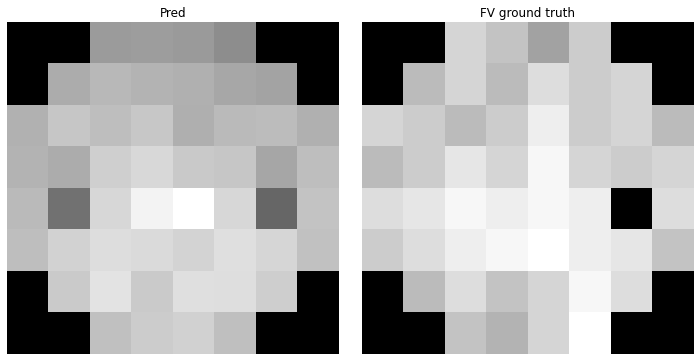

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/1310627_R_predFV.jpg
25.467154 float32 25 int64
MSE : 19.23792613123078
PSNR: 17.261417038188647
SSIM: 0.8274013955621494
25 25
SSIM-tf: 0.18769040703773499


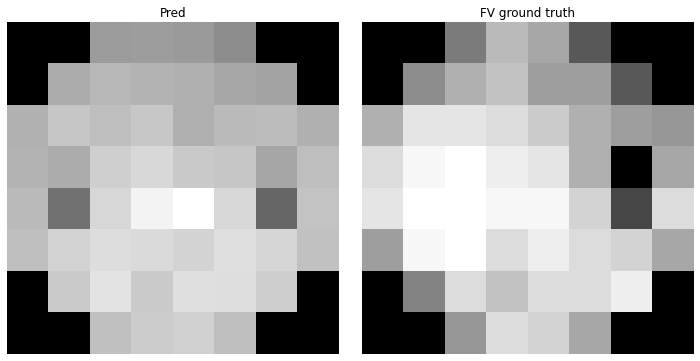

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/1342399_L_predFV.jpg
25.466578 float32 24 int64
MSE : 8.331998190871673
PSNR: 20.895507896625357
SSIM: 0.9151486619691952
25 24
SSIM-tf: 0.18769040703773499


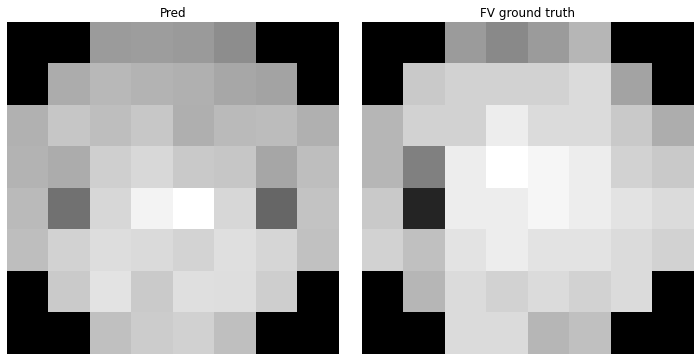

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/4154541_L_predFV.jpg
25.468496 float32 17 int64
MSE : 172.56999382257345
PSNR: 7.733346730831167
SSIM: 0.2525914579627133
25 17
SSIM-tf: 0.1876903474330902


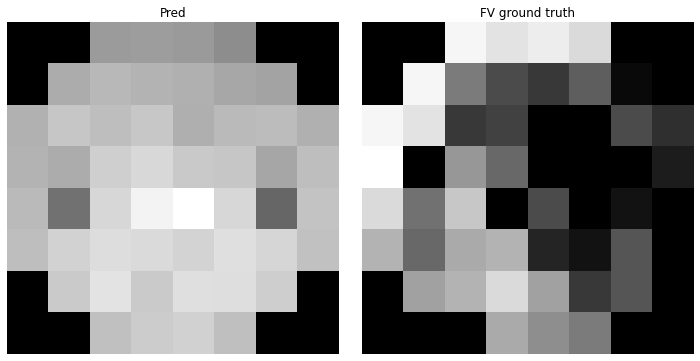

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/3407174_predFV.jpg
25.46882 float32 31 int64
MSE : 43.45339551195502
PSNR: 13.722762381223749
SSIM: 0.8871504546895941
25 31
SSIM-tf: 0.1876903474330902


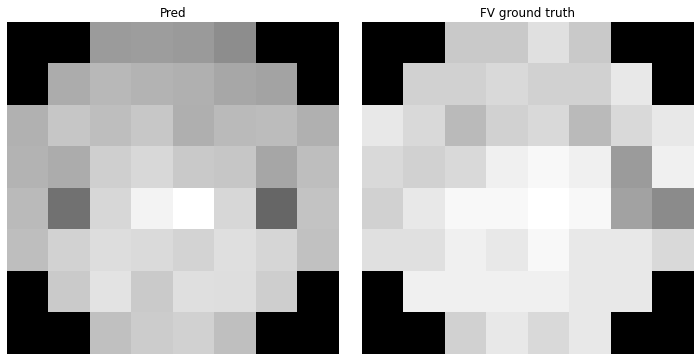

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/3806920_predFV.jpg
25.468473 float32 31 int64
MSE : 44.3813034100458
PSNR: 13.630999040011847
SSIM: 0.852546092917676
25 31
SSIM-tf: 0.1876903772354126


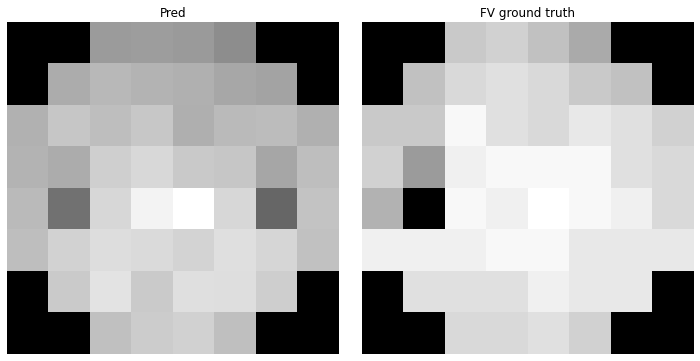

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/2987599_predFV.jpg
25.468737 float32 31 int64
MSE : 27.912973676458932
PSNR: 15.644938506247389
SSIM: 0.8407315292476132
25 31
SSIM-tf: 0.1876903772354126


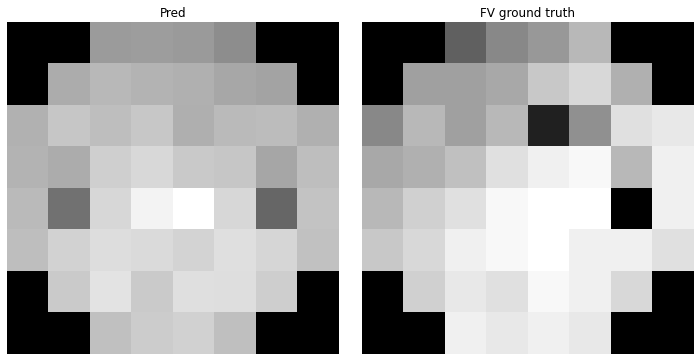

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/0849116_L_predFV.jpg
25.46889 float32 25 int64
MSE : 26.72140613150259
PSNR: 15.834406488286438
SSIM: 0.8458521241645478
25 25
SSIM-tf: 0.1876903474330902


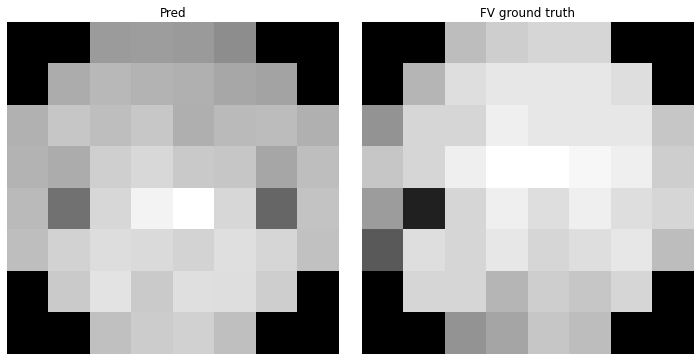

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/4475746_R_predFV.jpg
25.468271 float32 29 int64
MSE : 28.290577480802312
PSNR: 15.586581440656015
SSIM: 0.8522839301943195
25 29
SSIM-tf: 0.1876903921365738


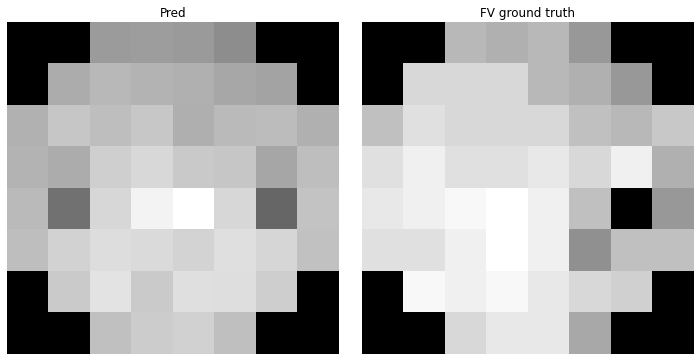

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/2216002_predFV.jpg
25.4676 float32 31 int64
MSE : 52.62888817489147
PSNR: 12.890757613253623
SSIM: 0.8380056673852607
25 31
SSIM-tf: 0.1876903921365738


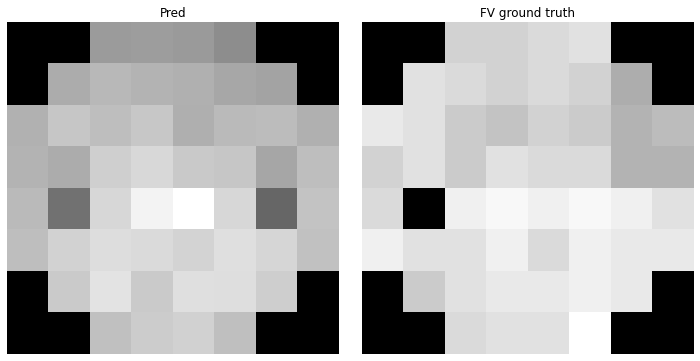

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/4154541_predFV.jpg
25.468788 float32 27 int64
MSE : 135.0262611915241
PSNR: 8.798817142084358
SSIM: 0.44783440200884334
25 27
SSIM-tf: 0.1876903772354126


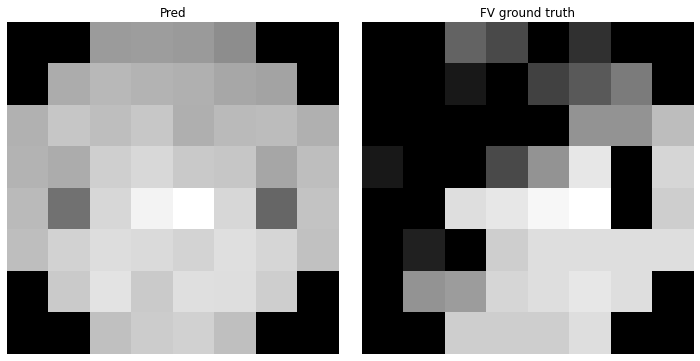

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/3321454_L_predFV.jpg
25.465982 float32 15 int64
MSE : 29.932652436429635
PSNR: 15.3415475375001
SSIM: 0.8255690674897365
25 15
SSIM-tf: 0.18769043684005737


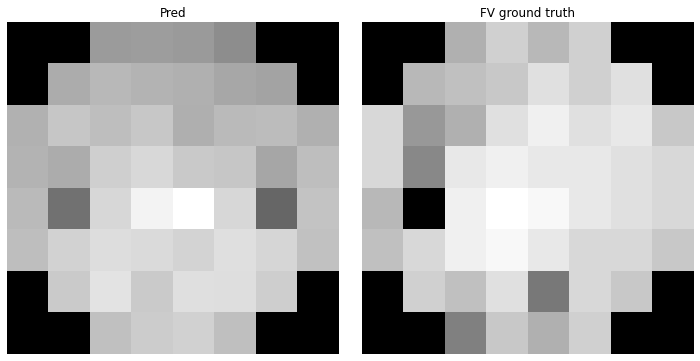

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/2815145_predFV.jpg
25.469076 float32 25 int64
MSE : 52.69222953924327
PSNR: 12.885533815989055
SSIM: 0.6271317881986069
25 25
SSIM-tf: 0.1876903474330902


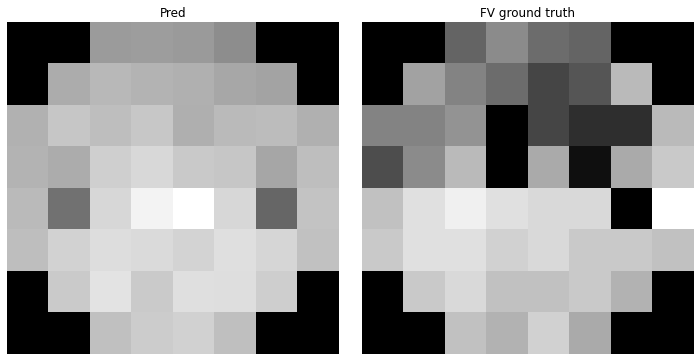

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/2376139_R_predFV.jpg
25.468714 float32 28 int64
MSE : 19.958122190990252
PSNR: 17.10180279430694
SSIM: 0.859213742065245
25 28
SSIM-tf: 0.1876903474330902


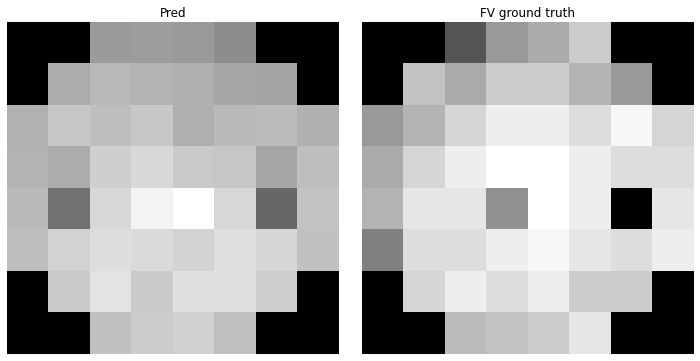

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/3001867_predFV.jpg
25.467575 float32 29 int64
MSE : 56.98550489638001
PSNR: 12.545355561266224
SSIM: 0.8049105300688871
25 29
SSIM-tf: 0.1876903921365738


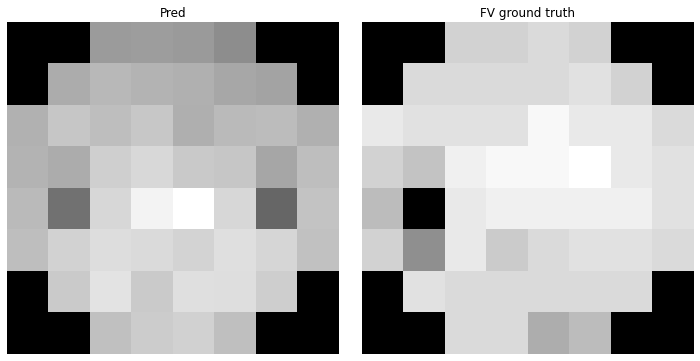

check filename: best_my_model_1006_bs32_p0_e200_FixedShuffle_224/1935572_L_predFV.jpg
25.46699 float32 26 int64
MSE : 27.77631033572834
PSNR: 15.666254008845774
SSIM: 0.888709578294503
25 26
SSIM-tf: 0.18769040703773499


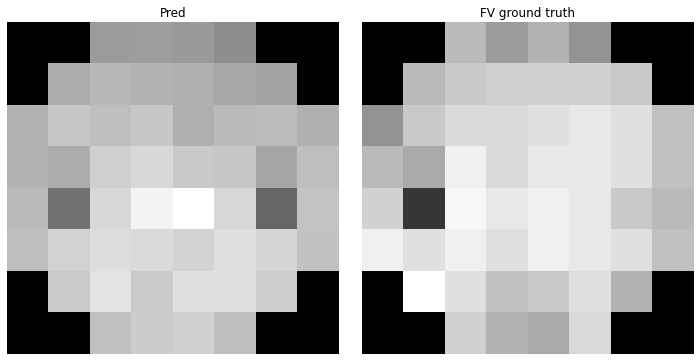

In [68]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error
"""
以MSE越小，則PSNR越大；所以PSNR越大，代表著圖像質量越好。
PSNR高於40dB說明圖像質量極好（即非常接近原始圖像），
在30—40dB通常表示圖像質量是好的（即失真可以察覺但可以接受），
在20—30dB說明圖像質量差；
PSNR低於20dB圖像不可接受

peak_signal_noise_ratio:
data_rangeint, optional
The data range of the input image (distance between minimum and maximum possible values). By default, this is estimated from the image data-type.
int: 0 ~ 255
FV:  0 ~ 32 ??

SSIM具有對稱性，即SSIM(x,y)=SSIM(y,x)
SSIM是一個0到1之間的數，越大表示輸出圖像和無失真圖像的差距越小，即圖像質量越好。當兩幅圖像一模一樣時，SSIM=1；

"""

# points_train, points_val
for i in range(len(val_points_dict)): # Also use same val_dict to get the filename and ordering.
    
    # get the filename from val dict
    val_points_dict_list = list(val_points_dict.items())
    fv_img_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_predFV.jpg"
    print("check filename:", fv_img_name)
    fv_metrics_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_metrics.txt"
    
    prd_p = reshape_FV_value_list(val_points_pred[i])
    gt_p = reshape_FV_value_list(points_val[i])
    
    #check single vale in the map
    print(prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
    print(f'MSE : {mean_squared_error(prd_p.astype(np.float32), gt_p.astype(np.float32))}')                                                                       # dtype('float32') dtype('int64')
    print(f'PSNR: {peak_signal_noise_ratio(prd_p.astype(np.float32), gt_p.astype(np.float32), data_range=32)}')                 # astype(np.float32)
    print(f'SSIM: {structural_similarity(prd_p.astype(np.float32), gt_p.astype(np.float32), full=False, multichannel=False, data_range=32)}') 
    print(prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4])
    
    # img_array = tf.expand_dims(img_array, 0) # Create a batch
#     prd_tmp = tf.expand_dims(prd_p, 0)
#     gt_tmp  = tf.expand_dims(gt_p, 0)
#     prd_tmp = tf.expand_dims(prd_p.astype(np.float32), 0)
#     gt_tmp  = tf.expand_dims(gt_p.astype(np.float32), 0)
#     prd_tmp = tf.expand_dims(tf.image.convert_image_dtype(prd_p, tf.float32), 0)
#     gt_tmp  = tf.expand_dims(tf.image.convert_image_dtype(gt_p, tf.float32), 0)

    prd_tmp = tf.image.convert_image_dtype(prd_p, tf.float32)
    gt_tmp  = tf.image.convert_image_dtype(gt_p, tf.float32)
    prd_tmp = tf.expand_dims(prd_tmp, 0)
    gt_tmp  = tf.expand_dims(gt_tmp, 0)
    
    print(f'SSIM-tf: {tf.image.ssim(prd_tmp, gt_tmp, max_val=32, filter_size=1, filter_sigma=1.5, k1=0.01, k2=0.03)}')
#     print(f'SSIM-tf: {tf.image.ssim(tf.expand_dims(prd_p.astype(np.float32), 0), tf.expand_dims(gt_p.astype(np.float32), 0), max_val=32, filter_size=2, filter_sigma=1.5, k1=0.01, k2=0.03)}')
    
    
    
#     # save metrics to _metrics.txt, commnet if not to rewrite the files.
#     with open(fv_metrics_name, "w") as txt_file:
#         txt_file.write(f'MSE : {mean_squared_error(prd_p, gt_p)}\n')
#         txt_file.write(f'PSNR: {peak_signal_noise_ratio(prd_p.astype(np.uint8), gt_p.astype(np.uint8))}\n')
#         txt_file.write(f'SSIM: {structural_similarity(prd_p.astype(np.uint8), gt_p.astype(np.uint8), full=False, multichannel=False)}\n')
#         txt_file.write("\n")
    
    fig, axarr = plt.subplots(1,2,figsize=(10,5))
    axarr[0].imshow(prd_p, interpolation='nearest', cmap="gray")
    axarr[0].set_title("Pred")
    axarr[0].axis('off')

    axarr[1].imshow(gt_p, interpolation='nearest', cmap="gray")
    axarr[1].set_title("FV ground truth")
    axarr[1].axis('off')
   
    fig.tight_layout()    
    plt.savefig(fv_img_name, dpi=150)
    plt.show()

## dispay pred_FV_value as 3D
    https://matplotlib.org/2.0.2/examples/mplot3d/contourf3d_demo.html
    
    sudo ip3 install ipympl

In [ ]:
# test mesh grid

nx, ny = (8, 8)
x = np.linspace(0, 7, nx)
y = np.linspace(0, 7, ny)

xv, yv = np.meshgrid(x, y, indexing='xy')



# for i in range(nx):
#     for j in range(ny):
#     # treat xv[j,i], yv[j,i]
#         print(xv[j,i], yv[j,i])
        
        

In [ ]:
xv

In [ ]:
xv.shape

In [ ]:
plt.imshow(xv, interpolation='nearest', cmap="gray")
plt.show()

In [ ]:

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig) # Axes3D(fig) adding itself to the figure is deprecated since 3.4.


# surface of val
X, Y, Z = xv, yv, reshape_FV_value_list(points_val[0])
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.3)

# surface of pred
X, Y, Z = xv, yv, reshape_FV_value_list(val_points_pred[0])
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.3,  color="red")

# contourf
# cset = ax.contourf(X, Y, Z, cmap=cm.coolwarm)

# project contour
# cset = ax.contour(X, Y, Z, zdir='z', offset=-0, cmap=cm.coolwarm)
# cset = ax.contour(X, Y, Z, zdir='x', offset=-0, cmap=cm.coolwarm)


# ax.clabel(cset, fontsize=9, inline=1)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## display pred_FV_value to image

In [ ]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error
"""
以MSE越小，則PSNR越大；所以PSNR越大，代表著圖像質量越好。
PSNR高於40dB說明圖像質量極好（即非常接近原始圖像），
在30—40dB通常表示圖像質量是好的（即失真可以察覺但可以接受），
在20—30dB說明圖像質量差；
PSNR低於20dB圖像不可接受

SSIM具有對稱性，即SSIM(x,y)=SSIM(y,x)
SSIM是一個0到1之間的數，越大表示輸出圖像和無失真圖像的差距越小，即圖像質量越好。當兩幅圖像一模一樣時，SSIM=1；

"""

# points_train, points_val
for i in range(len(points_val)):
    prd_p = reshape_FV_value_list(val_points_pred[i])
    gt_p = reshape_FV_value_list(points_val[i])
    
    #check single vale in the map
    print(prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
    print(f'MSE : {mean_squared_error(prd_p, gt_p)}')
    print(f'PSNR: {peak_signal_noise_ratio(prd_p.astype(np.uint8), gt_p.astype(np.uint8))}')
    print(f'SSIM: {structural_similarity(prd_p.astype(np.uint8), gt_p.astype(np.uint8), full=False, multichannel=False)}')
    print(prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4])
    
    fig, axarr = plt.subplots(1,2,figsize=(10,5))
    axarr[0].imshow(prd_p, interpolation='nearest', cmap="gray")
    axarr[0].set_title("Pred")
    axarr[0].axis('off')

    axarr[1].imshow(gt_p, interpolation='nearest', cmap="gray")
    axarr[1].set_title("FV ground truth")
    axarr[1].axis('off')
   
    fig.tight_layout()
    plt.show()
    

In [ ]:
640/8

In [ ]:
val_zero = np.zeros((640,640))

In [ ]:
val_zero.shape

In [ ]:
val_zero = np.zeros((52,52))

In [ ]:
val_zero.shape

In [ ]:
plt.imshow(val_zero, interpolation='nearest', cmap="gray")
plt.show()

In [ ]:
val_zero[:,:] = points_val[0]

In [ ]:
plt.imshow(val_zero, interpolation='nearest', cmap="gray")
plt.show()

In [ ]:
points_val[0][:]

In [ ]:
mape = tf.keras.losses.MeanAbsolutePercentageError()

In [ ]:
mape(points_val[0], val_points_pred[0]).numpy()

In [ ]:
mape(points_val[1], val_points_pred[1]).numpy()

In [ ]:
mae = tf.keras.losses.MeanAbsoluteError()

In [ ]:
mae(points_val[0], val_points_pred[0]).numpy()

In [ ]:
mae(points_val[1], val_points_pred[1]).numpy()

In [ ]:
mse = tf.keras.losses.MeanSquaredError()

In [ ]:
mse(points_val[0], val_points_pred[0]).numpy()

In [ ]:
mse(points_val[1], val_points_pred[1]).numpy()

In [ ]:
mse([1], [3]).numpy()

### Visualize results (org keypoing plot)

Now visualize neural network results on several images from validation sample. Make sure that your network outputs different points for images (i.e. it doesn't output some constant).

In [ ]:
val_points_pred = model.predict(imgs_val)

In [ ]:
print(val_points_pred.shape)

In [ ]:
for i in range(11,15):
    visualize_points(imgs_val[i], val_points_pred[i])

Conclusion

The facial keypoints regression works quite well as seen above. Final MSE on Validation set ~ 0.013.

Due to my computational limitations, I trained the regressor on 50x50 images instead of 100x100 images. I also had to read half the dataset, train the NN, save the weights, and then train the other half. (Otherwise there was a MemoryError). This explains the extremely low loss that can be seen in the output of the model.fit. 